In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import sys
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
from sklearn import model_selection
import keras
import tensorflow

from keras.models import Sequential

from keras.layers import Dense

from keras.optimizers import Adam

from keras.layers import Dropout
from keras import regularizers
from sklearn.metrics import classification_report, accuracy_score

In [5]:
data = pd.read_csv("heart.csv") # Reads the csv file with the health record in them

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


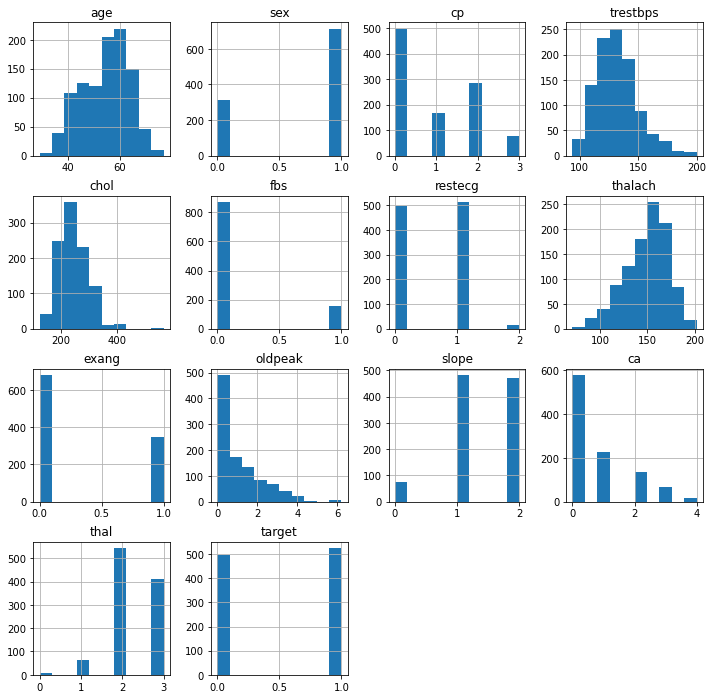

In [7]:
data.hist(figsize = (12,12))
plt.show()

In [8]:
data.shape #Dimensions found in the data (1025 rows, 14 columns)

(1025, 14)

In [9]:
data.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


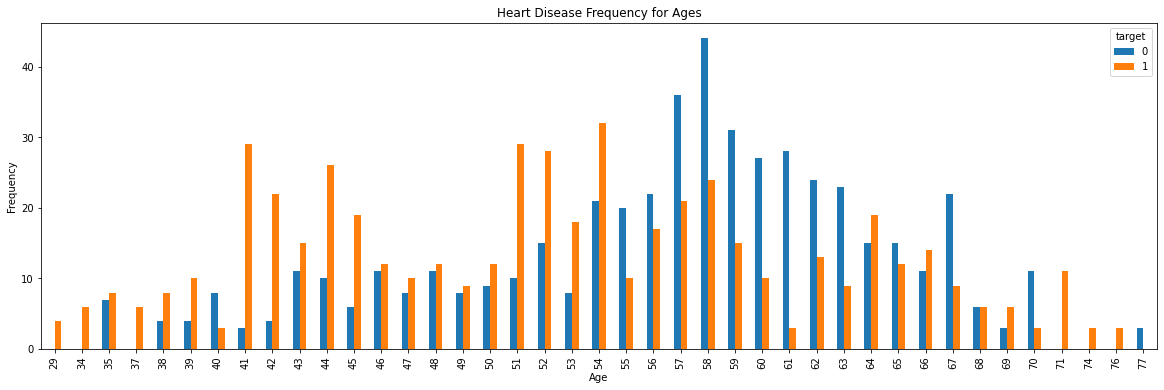

In [8]:
pd.crosstab(data.age, data.target).plot(kind="bar", figsize=(20,6)) #
plt.title("Heart Disease Frequency for Ages")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

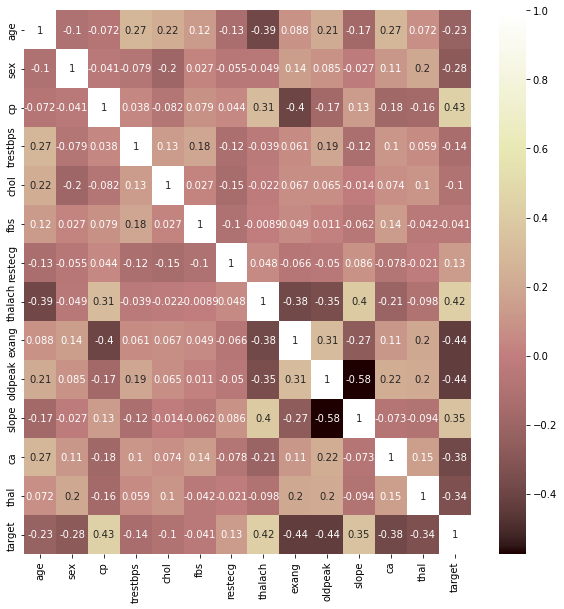

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True, cmap="pink") #creates a heat map out of the averages found in the data
plt.show()

In [14]:
X = np.array(data.drop(['target'], 1)) 
y = np.array(data['target'])

C:\Users\Sjing\AppData\Local\Temp\ipykernel_15176\1844786348.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['target'], 1))


In [15]:
X[0]

array([ 52.,   1.,   0., 125., 212.,   0.,   1., 168.,   0.,   1.,   2.,
         2.,   3.])

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

In [19]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None) #Creating variables to test, then train a machine learning algorithm with
print (Y_train.shape)
print (Y_train[:10])

(820, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [23]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


D:\Year 3\Machine learning\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [24]:
history= model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=500, batch_size=10)

Epoch 1/500
82/82 [==============================] - 3s 6ms/step - loss: 0.7539 - accuracy: 0.5317 - val_loss: 0.6888 - val_accuracy: 0.4878
Epoch 2/500
82/82 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5610 - val_loss: 0.6683 - val_accuracy: 0.5561
Epoch 3/500
82/82 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.6098 - val_loss: 0.6133 - val_accuracy: 0.6683
Epoch 4/500
82/82 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.6549 - val_loss: 0.6239 - val_accuracy: 0.6732
Epoch 5/500
82/82 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.6768 - val_loss: 0.5750 - val_accuracy: 0.6829
Epoch 6/500
82/82 [==============================] - 0s 2ms/step - loss: 0.5915 - accuracy: 0.6841 - val_loss: 0.5657 - val_accuracy: 0.7268
Epoch 7/500
82/82 [==============================] - 0s 2ms/step - loss: 0.5649 - accuracy: 0.7244 - val_loss: 0.5398 - val_accuracy: 0.7366
Epoch 8/500
8

Epoch 59/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8012 - val_loss: 0.3651 - val_accuracy: 0.8634
Epoch 60/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4632 - accuracy: 0.8146 - val_loss: 0.3879 - val_accuracy: 0.8000
Epoch 61/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.8110 - val_loss: 0.4112 - val_accuracy: 0.8000
Epoch 62/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.8061 - val_loss: 0.4008 - val_accuracy: 0.8439
Epoch 63/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.8195 - val_loss: 0.4164 - val_accuracy: 0.8146
Epoch 64/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8098 - val_loss: 0.3674 - val_accuracy: 0.8439
Epoch 65/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.8134 - val_loss: 0.3721 - val_accuracy: 0.8390
Epoch 

82/82 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.7939 - val_loss: 0.3816 - val_accuracy: 0.8439
Epoch 174/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8159 - val_loss: 0.3862 - val_accuracy: 0.8585
Epoch 175/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.8305 - val_loss: 0.3683 - val_accuracy: 0.8537
Epoch 176/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.8256 - val_loss: 0.4049 - val_accuracy: 0.8049
Epoch 177/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8195 - val_loss: 0.3761 - val_accuracy: 0.8293
Epoch 178/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.8134 - val_loss: 0.3573 - val_accuracy: 0.8585
Epoch 179/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8427 - val_loss: 0.3818 - val_accuracy: 0.8488
Epoch 180/500

82/82 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.8378 - val_loss: 0.3881 - val_accuracy: 0.8293
Epoch 288/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8268 - val_loss: 0.3990 - val_accuracy: 0.8049
Epoch 289/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.8366 - val_loss: 0.3539 - val_accuracy: 0.8829
Epoch 290/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.8171 - val_loss: 0.3895 - val_accuracy: 0.8683
Epoch 291/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8256 - val_loss: 0.3559 - val_accuracy: 0.8585
Epoch 292/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8256 - val_loss: 0.3627 - val_accuracy: 0.8488
Epoch 293/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.8378 - val_loss: 0.3694 - val_accuracy: 0.8488
Epoch 294/500

82/82 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.8232 - val_loss: 0.3885 - val_accuracy: 0.8537
Epoch 402/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.8378 - val_loss: 0.3612 - val_accuracy: 0.8683
Epoch 403/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8207 - val_loss: 0.4054 - val_accuracy: 0.8390
Epoch 404/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8390 - val_loss: 0.3929 - val_accuracy: 0.8439
Epoch 405/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.8232 - val_loss: 0.4042 - val_accuracy: 0.8488
Epoch 406/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.8341 - val_loss: 0.3716 - val_accuracy: 0.8390
Epoch 407/500
82/82 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8354 - val_loss: 0.3768 - val_accuracy: 0.8488
Epoch 408/500

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title()
plt.ylabel('')
plt.xlavel('')
plt.legend(['train', 'test'])
plt.show()

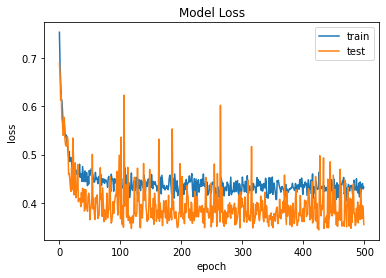

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [28]:
categorical_pred = np.argmax(model.predict(X_test), axis=1) 

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

7/7 [==============================] - 0s 1ms/step
Results for Categorical Model
0.848780487804878
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       100
           1       0.81      0.92      0.86       105

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205

